In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
np.random.seed(2345332)

In [5]:
mean1=np.array([0,0,0])
co_variance=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1=np.random.multivariate_normal(mean1,co_variance,200)

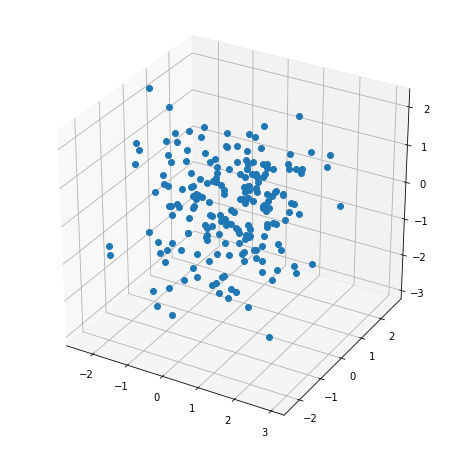

In [6]:
from mpl_toolkits.mplot3d import Axes3D,proj3d
figu=plt.figure(figsize=(8,8))
ax=figu.add_subplot(111,projection='3d')
ax.plot(class1[:,0],class1[:,1],class1[:,2],'o')

In [7]:
all_data_transposed=class1.T
covariance=np.cov(all_data_transposed)
covariance

array([[ 1.06848391,  0.02582015, -0.01958873],
       [ 0.02582015,  1.06419127,  0.0683858 ],
       [-0.01958873,  0.0683858 ,  1.0662109 ]])

In [8]:
# finding the eigen values we will use np.linearalgebra
eig_values,eig_vectors=np.linalg.eig(covariance)
print(eig_values,eig_vectors)
#eigen vector is given colunm wise not row wise

[0.98449177 1.08049965 1.13389467] [[-0.35780432  0.93102907  0.07183971]
 [ 0.6721344   0.20337304  0.71195137]
 [-0.64823716 -0.30302522  0.69854442]]


In [9]:
eigen_value_vector_pairs=[]
for i in range(len(eig_values)):
    eigen_vect=eig_vectors[:,i] #beacase from np.linalg.eig(covariance) it return eigen vector is given colunm wise not row wise
    eigen_value_vector_pairs.append((eig_values[i],eigen_vect))
    
eigen_value_vector_pairs.sort(reverse=True)
eigen_value_vector_pairs

[(1.133894668986456, array([0.07183971, 0.71195137, 0.69854442])),
 (1.0804996472368753, array([ 0.93102907,  0.20337304, -0.30302522])),
 (0.9844917671093774, array([-0.35780432,  0.6721344 , -0.64823716]))]

In [19]:
P = eig_vectors.T.dot(class1.T)
P.T

array([[-5.88823472e-01, -5.28977444e-01, -2.57311610e+00],
       [-1.06643067e+00, -2.90756437e-01, -1.09203017e+00],
       [-1.36492298e-01, -2.12219467e-01,  3.77854870e-01],
       [ 1.10790924e-01, -8.72801084e-01,  9.87045163e-02],
       [-6.80024450e-01,  1.03642815e+00, -9.69501895e-01],
       [-5.65149447e-01,  8.26555882e-01,  1.15136645e+00],
       [-5.32303455e-01, -3.89683741e-01, -1.00509766e+00],
       [-7.90041180e-01,  9.31450191e-01, -2.00687013e+00],
       [ 1.09307313e+00, -4.70216537e-01,  1.14374891e-01],
       [ 2.23102718e-01,  1.85225212e+00, -8.48210295e-01],
       [ 1.32841044e+00,  3.86280834e-01,  1.54570981e+00],
       [-9.73886457e-02, -6.90167444e-01, -1.32381764e+00],
       [ 1.18193091e+00,  1.14410009e+00, -6.42294002e-01],
       [-4.91317129e-01, -2.74048432e+00,  1.72828873e+00],
       [ 7.78196245e-01, -1.27698833e+00, -4.18078080e-01],
       [-8.37700570e-01,  7.68295223e-01, -1.14386092e+00],
       [ 6.06108857e-01,  8.21888438e-01

In [16]:
#using the inbuilt pca
pca=PCA()
transformed_data=pca.fit_transform(class1)
print(pca.components_)
print(pca.explained_variance_) 

#you can see that top 2 are same as the above self created

[[ 0.07183971  0.71195137  0.69854442]
 [-0.93102907 -0.20337304  0.30302522]
 [ 0.35780432 -0.6721344   0.64823716]]
[1.13389467 1.08049965 0.98449177]


In [17]:
transformed_data

array([[-2.61518227e+00,  6.87815607e-01,  6.95002605e-01],
       [-1.13409635e+00,  4.49594599e-01,  1.17260980e+00],
       [ 3.35788690e-01,  3.71057630e-01,  2.42671431e-01],
       [ 5.66383366e-02,  1.03163925e+00, -4.61179152e-03],
       [-1.01156807e+00, -8.77589983e-01,  7.86203582e-01],
       [ 1.10930027e+00, -6.67717719e-01,  6.71328580e-01],
       [-1.04716384e+00,  5.48521903e-01,  6.38482588e-01],
       [-2.04893631e+00, -7.72612028e-01,  8.96220313e-01],
       [ 7.23087111e-02,  6.29054700e-01, -9.86893993e-01],
       [-8.90276474e-01, -1.69341396e+00, -1.16923585e-01],
       [ 1.50364363e+00, -2.27442672e-01, -1.22223130e+00],
       [-1.36588382e+00,  8.49005607e-01,  2.03567779e-01],
       [-6.84360182e-01, -9.85261924e-01, -1.07575177e+00],
       [ 1.68622255e+00,  2.89932248e+00,  5.97496262e-01],
       [-4.60144259e-01,  1.43582650e+00, -6.72017112e-01],
       [-1.18592710e+00, -6.09457060e-01,  9.43879703e-01],
       [ 4.27270895e-01, -6.63050276e-01